<a href="https://colab.research.google.com/github/radhakrishnan-omotec/football_predict/blob/main/Paper_FootBall_Prediction_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Model : Football-player-price-prediction

In [ ]:
!git clone https://github.com/radhakrishnan-omotec/football_predict.git

Cloning into 'football_predict'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 40 (delta 18), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (40/40), 5.35 MiB | 13.47 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import itertools
import json
import pickle

In [ ]:
df = pd.read_csv('/content/football_predict/football.csv')

In [ ]:
df, test_df = train_test_split(df)

In [ ]:
test_df.to_csv('/content/football_predict/test_df.csv', index=False)

In [ ]:
# Remove % sign from fpl_sel and convert to float
df.fpl_sel = df.fpl_sel.apply(lambda x : float(x[:-1]))

In [ ]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
377,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,35.1,224,1.0,England,0,2,17,1,0
159,Davy Klaassen,Everton,24,AM,1,18.0,428,7.5,3.6,0,2.0,Netherlands,1,2,7,0,0
309,DuÅ¡an TadiÄ‡,Southampton,28,LW,1,17.0,458,6.5,4.9,108,2.0,Portugal,0,4,14,0,0
371,Nathan Dyer,Swansea,29,RW,1,3.5,313,4.5,0.1,12,1.0,England,0,4,16,0,0
380,Hugo Lloris,Tottenham,30,GK,4,24.0,847,5.5,12.6,143,2.0,France,0,4,17,1,0


In [ ]:
    df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,344.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,26.979710,2.171014,10.967971,733.321739,5.450725,3.129565,57.417391,2.005814,0.031884,3.260870,10.443478,0.284058,0.144928
std,3.860525,0.995499,12.364761,877.033844,1.335628,5.404767,50.911857,0.971891,0.175947,1.244198,5.862561,0.451620,0.352539
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,218.000000,4.500000,0.200000,8.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,454.000000,5.000000,1.100000,52.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,860.000000,6.000000,3.500000,92.000000,2.000000,0.000000,4.000000,16.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7435.000000,12.500000,45.000000,224.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


One null value in region. Som drop that record

In [ ]:
df = df.dropna()
df.shape

(344, 17)

<ipython-input-11-65ea7e3dbf9e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidth = 0.02,cmap = 'RdYlGn')


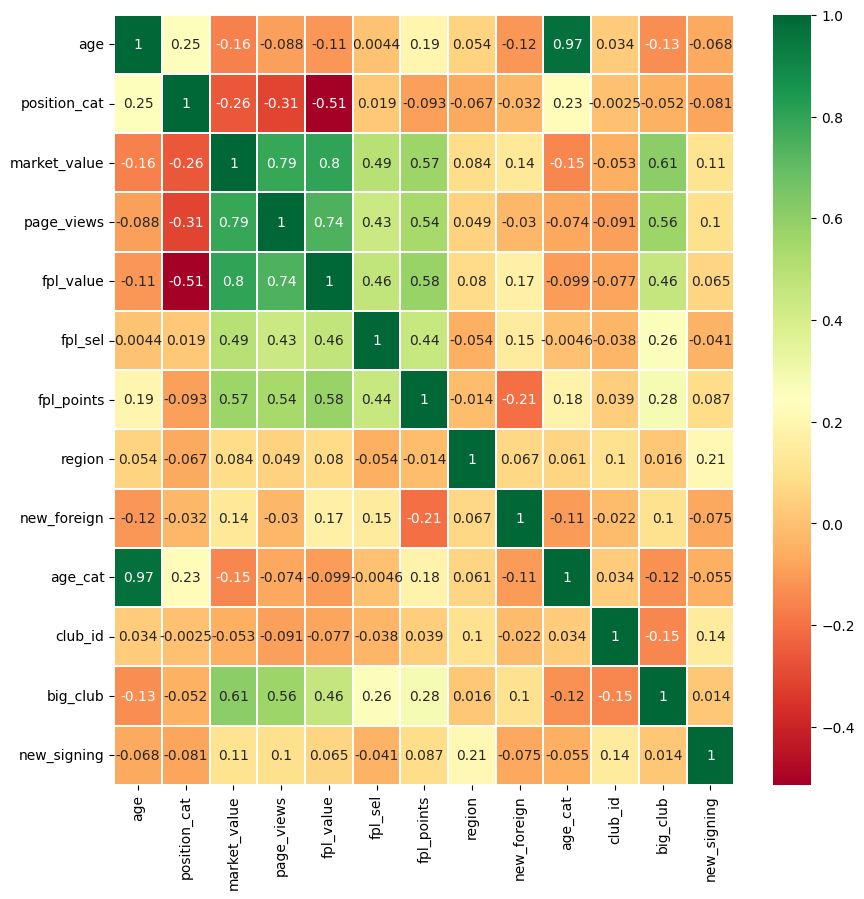

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth = 0.02,cmap = 'RdYlGn')
plt.show()

Either use age or age_cat. They are highly correlated

Also, fpl_value, page_views are important for market_value

In [ ]:
removed_df = df.drop(['name','club','age_cat','position'], axis=1)

In [ ]:
removed_df.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,club_id,big_club,new_signing
377,23,1,60.0,4161,12.5,35.1,224,1.0,England,0,17,1,0
159,24,1,18.0,428,7.5,3.6,0,2.0,Netherlands,1,7,0,0
309,28,1,17.0,458,6.5,4.9,108,2.0,Portugal,0,14,0,0
371,29,1,3.5,313,4.5,0.1,12,1.0,England,0,16,0,0
380,30,4,24.0,847,5.5,12.6,143,2.0,France,0,17,1,0


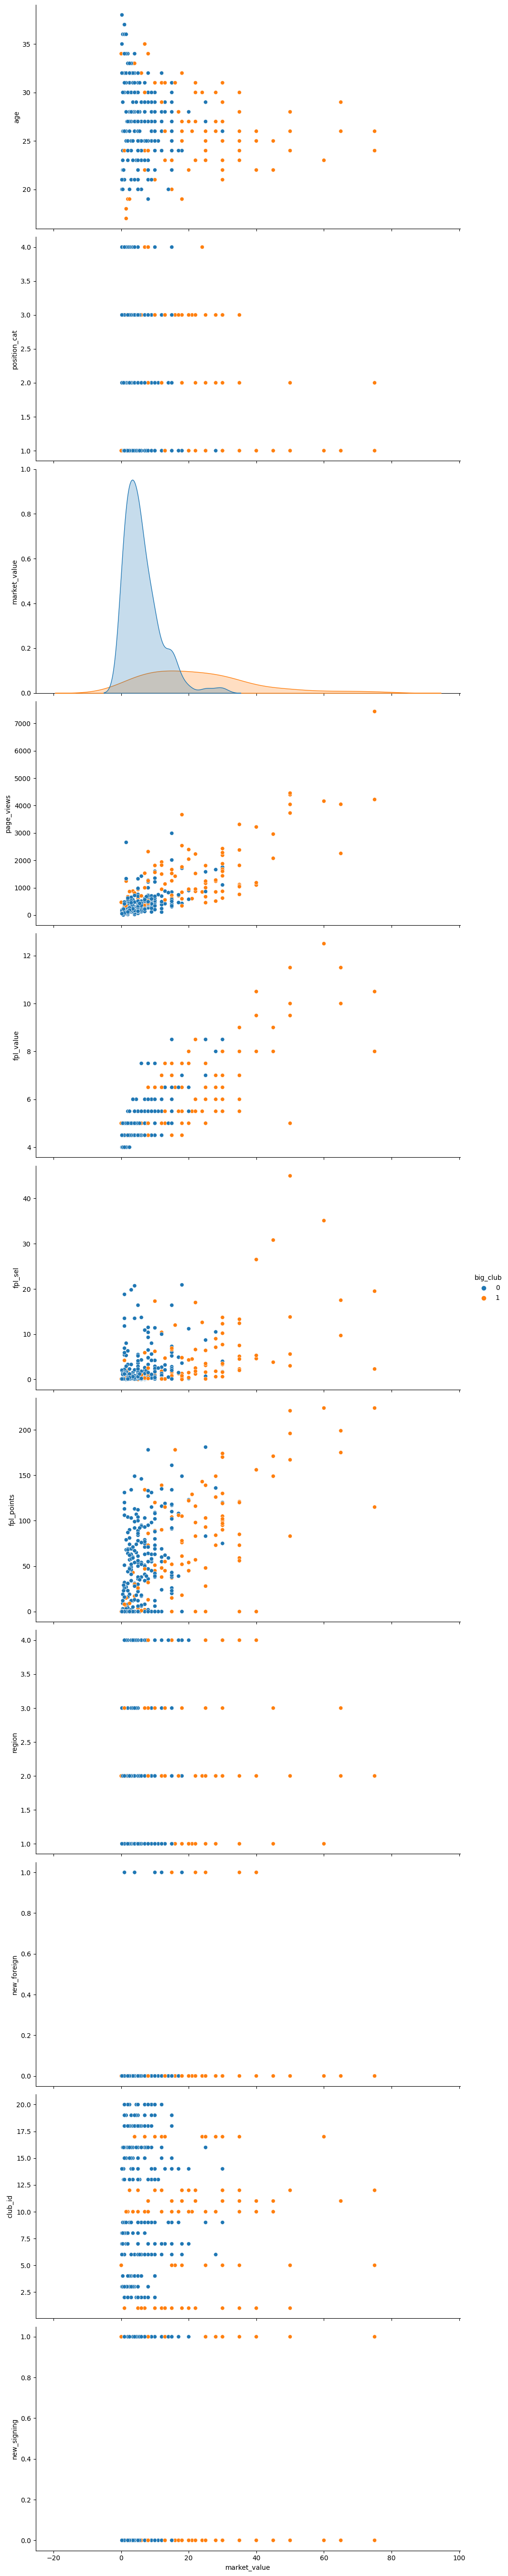

In [ ]:
sns.pairplot(removed_df, x_vars='market_value', hue = 'big_club', height = 5, aspect = 2)

The continuous variables are nicely correlated with the market value. Mostly linear

Those who belong to big club have higher market value

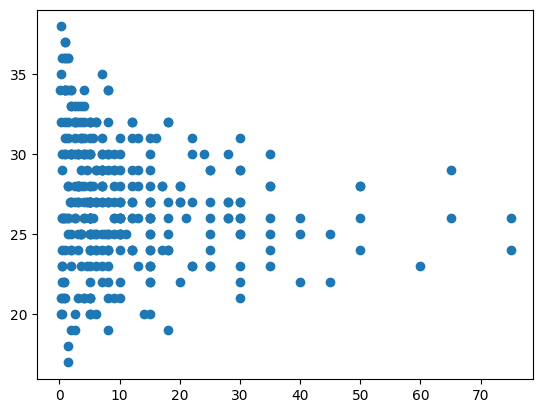

In [ ]:
plt.scatter(removed_df.market_value, removed_df.age)

Interestingly, it looks like a normal distribution.

Players aged around 25 have higher market value

**Binning might help**

* I'll bring back the age_cat attribute and move further with that one

In [ ]:
removed_df = pd.concat([removed_df.drop('age', axis=1), df.age_cat], axis=1)

In [ ]:
removed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 377 to 54
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   position_cat  344 non-null    int64  
 1   market_value  344 non-null    float64
 2   page_views    344 non-null    int64  
 3   fpl_value     344 non-null    float64
 4   fpl_sel       344 non-null    float64
 5   fpl_points    344 non-null    int64  
 6   region        344 non-null    float64
 7   nationality   344 non-null    object 
 8   new_foreign   344 non-null    int64  
 9   club_id       344 non-null    int64  
 10  big_club      344 non-null    int64  
 11  new_signing   344 non-null    int64  
 12  age_cat       344 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 37.6+ KB


In [ ]:
all_columns = removed_df.columns
category_cols = ['position_cat', 'region', 'nationality', 'new_foreign', 'club_id', 'big_club', 'new_signing', 'age_cat']

In [ ]:
final_df = removed_df.copy()
final_df.reset_index(drop=True, inplace=True)

In [ ]:
column_dict = {i:[] for i in category_cols}
for i in category_cols:
    temp = pd.get_dummies(final_df[i], prefix=i)
    column_dict[i].extend(temp.columns)
    others = pd.Series(np.zeros(final_df.shape[0]), name=i+'_others')
    temp = pd.concat([temp, others], axis=1)
    final_df = pd.concat([final_df.drop(i, axis=1), temp], axis=1)

In [ ]:
final_df.columns

Index(['market_value', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points',
       'position_cat_1', 'position_cat_2', 'position_cat_3', 'position_cat_4',
       'position_cat_others',
       ...
       'new_signing_0', 'new_signing_1', 'new_signing_others', 'age_cat_1',
       'age_cat_2', 'age_cat_3', 'age_cat_4', 'age_cat_5', 'age_cat_6',
       'age_cat_others'],
      dtype='object', length=111)

In [ ]:
all_cat_cols = []
for i in column_dict.keys():
    all_cat_cols.extend(column_dict[i]+[i+'_others'])

# all_cat_cols

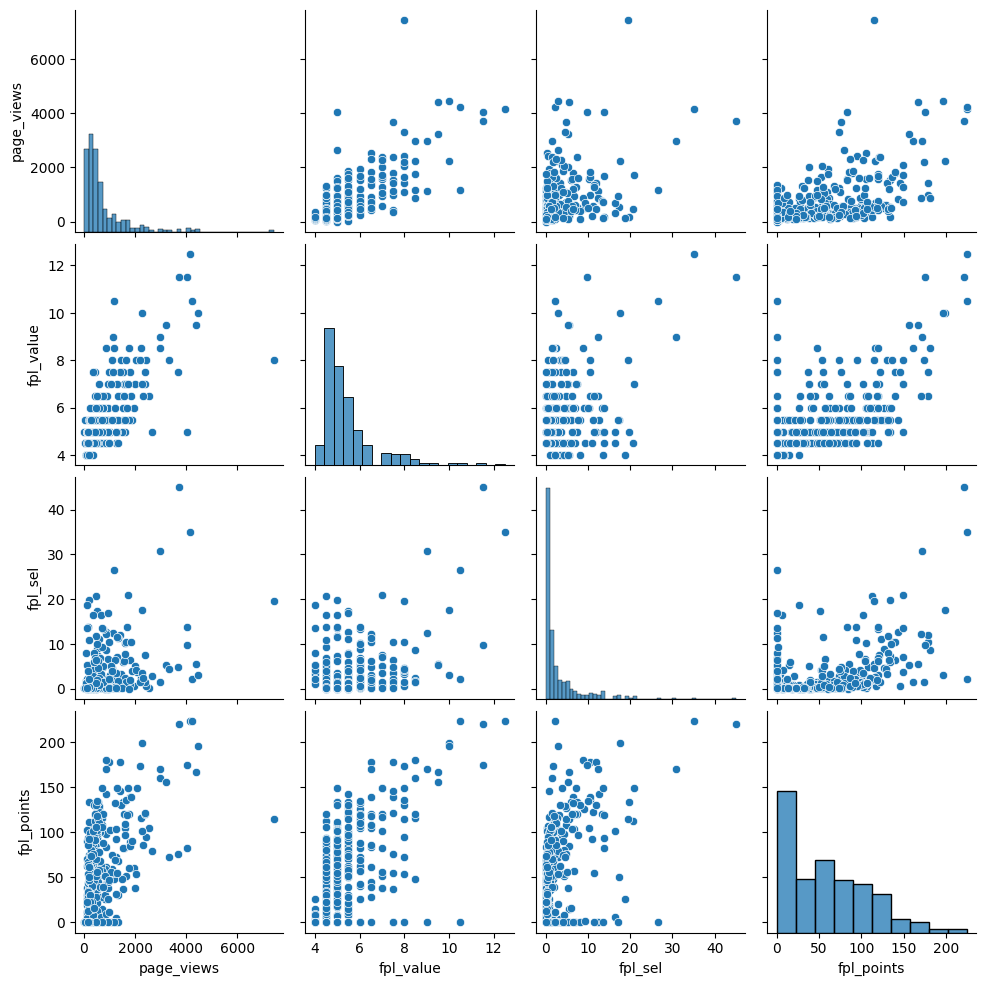

In [ ]:
cont_cols_df = final_df.drop(all_cat_cols+['market_value'], axis = 1)
sns.pairplot(cont_cols_df)

## Take care of skewness by different transform

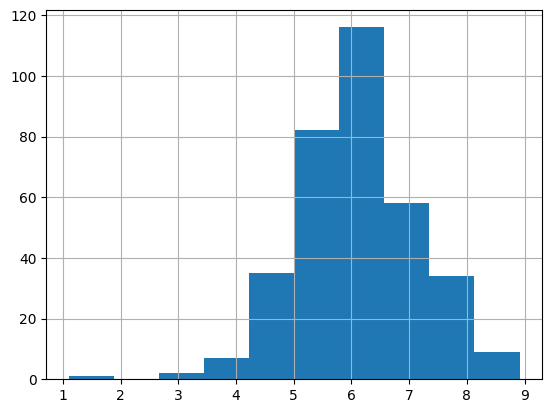

In [ ]:
cont_cols_df.page_views.apply(np.log).hist()
cont_cols_df.page_views = cont_cols_df.page_views.apply(np.log)

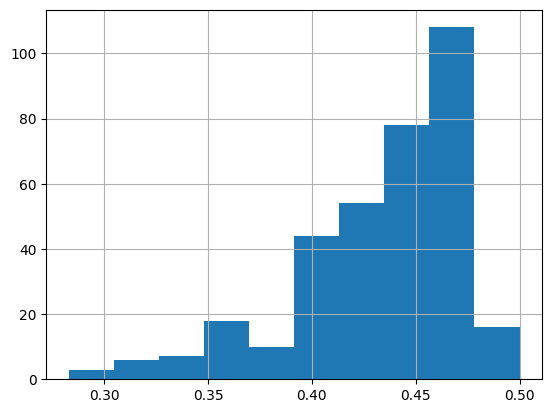

In [ ]:
cont_cols_df.fpl_value.apply(lambda x : x**(-1/2)).hist()
cont_cols_df.fpl_value = cont_cols_df.fpl_value.apply(lambda x : x**(-1/2))

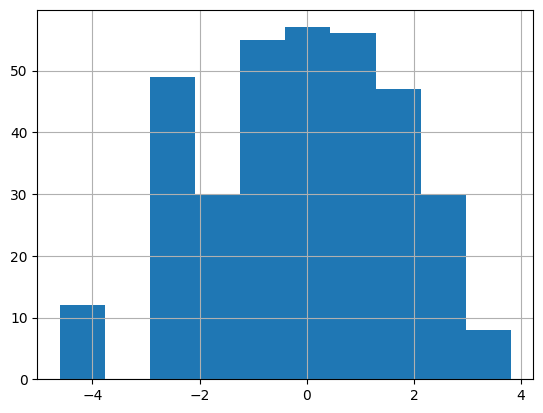

In [ ]:
cont_cols_df.fpl_sel.apply(lambda x: np.log(x+0.01)).hist()
cont_cols_df.fpl_sel = cont_cols_df.fpl_sel.apply(lambda x: np.log(x+0.01))

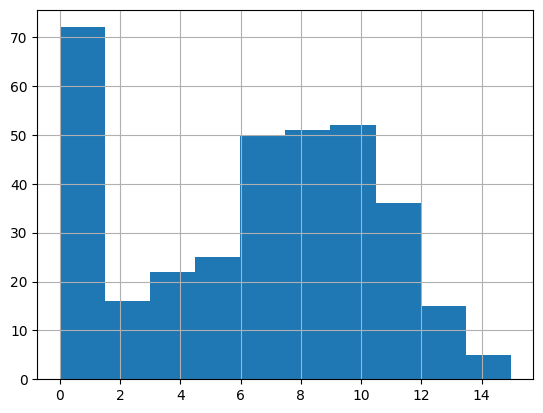

In [ ]:
cont_cols_df.fpl_points.apply(lambda x : x**(1/2)).hist()
cont_cols_df.fpl_points = cont_cols_df.fpl_points.apply(lambda x : x**(1/2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar = MinMaxScaler()
cont_cols_scaled = scalar.fit_transform(cont_cols_df)

In [ ]:
final_df[cont_cols_df.columns] = cont_cols_scaled

In [ ]:
final_df.describe()

,market_value,page_views,fpl_value,fpl_sel,fpl_points,position_cat_1,position_cat_2,position_cat_3,position_cat_4,position_cat_others,...,new_signing_0,new_signing_1,new_signing_others,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_others
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.0,...,344.000000,344.000000,344.0,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.0
mean,10.983866,0.639416,0.704526,0.537791,0.425715,0.334302,0.244186,0.334302,0.087209,0.0,...,0.854651,0.145349,0.0,0.081395,0.174419,0.337209,0.273256,0.072674,0.061047,0.0
std,12.379242,0.131346,0.196034,0.209073,0.275792,0.472433,0.430229,0.472433,0.282553,0.0,...,0.352966,0.352966,0.0,0.273840,0.380022,0.473446,0.446280,0.259979,0.239764,0.0
min,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,0.548833,0.577487,0.361924,0.188982,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,7.000000,0.642260,0.756921,0.559855,0.481812,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,15.000000,0.724039,0.868319,0.696713,0.641738,1.000000,0.000000,1.000000,0.000000,0.0,...,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
# Save dataset
s = json.dumps(list(all_columns))
with open('all_columns.json', 'w') as f:
    json.dump(s, f)

cat_col_dict = json.dumps(column_dict)
with open('cat_col_dict.json', 'w') as f:
    json.dump(cat_col_dict, f)
final_df.to_csv('/content/football_predict/futbolPrepared.csv', index=False)

# Load Fresh data

In [ ]:
df = pd.read_csv('/content/football_predict/futbolPrepared.csv')
df.columns

Index(['market_value', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points',
       'position_cat_1', 'position_cat_2', 'position_cat_3', 'position_cat_4',
       'position_cat_others',
       ...
       'new_signing_0', 'new_signing_1', 'new_signing_others', 'age_cat_1',
       'age_cat_2', 'age_cat_3', 'age_cat_4', 'age_cat_5', 'age_cat_6',
       'age_cat_others'],
      dtype='object', length=111)

In [ ]:
X, y = df.drop('market_value', axis=1), df['market_value']

# Nearest Neighbors Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_validate

In [ ]:
def kfold_verify(X, y, model):
    kfcv = KFold(shuffle=True)
    cv_scores = cross_validate(model, X, y, cv=kfcv, scoring='neg_root_mean_squared_error' )
    return -(np.mean(cv_scores['test_score']))         # Lower is better

In [ ]:
def eval_weights(weight_arr, X, y):
    """
    Parameters:-
    weight_arr: 1D array, indicating the weights for each attributes
    Returns:-
    The cross-validation error rate for given weights
    """
    model = KNeighborsRegressor(10, metric='wminkowski', metric_params={'w':weight_arr})
    return kfold_verify(X, y, model)

## Optimize weights using Genetic Algorithm

In [ ]:
class GA(object):
    # Genetic Algorithm to maximize the accuracy by finding optimal attribute weights
    def __init__(self, pop_size, num_parents, num_offspring):
        """
        Parameters:-
        pop_size : tuple, indicating the size of population and the number of genes in one chromosome
        num_parents: int, indicating the number of parents to be chosen for crossover
        num_offspring: int, indicating the number of offsprings to be produced for next generation
        """
        self.pop_size = pop_size
        self.np = num_parents
        self.no = num_offspring

    def initialize(self, X, y):
        self.X = X
        self.y = y
        self.pop = np.random.uniform(5, size=self.pop_size)

    def calc_fitness(self, eval_func):
        """
        Parameters:-
        eval_func: callable, outputs the score of a chromosome. This score needs to be maximised/minimised
        """
        fitness = np.zeros(self.pop.shape[0])
        for i in range(self.pop.shape[0]):
            fitness[i] = eval_func(self.pop[i,:], self.X, self.y)
        return fitness
    def get_parents(self, fitness):
        """
        Parameters:-
        fitness: array, indicating the fitness score for each chromosome
        """
        sorted_fitness = np.argsort(fitness)
        self.parents = np.empty((self.np, self.pop_size[1]))
        for i in range(self.np):
            self.parents[i] = self.pop[sorted_fitness[i],:]

        return self.parents

    def crossover(self):
        cross_point = self.pop_size[1] // 2
        # create pair of parents to produce offspring
        candidates = itertools.product(range(self.parents.shape[0]), repeat=2)
        self.offspring = np.empty((self.no, self.pop_size[1]))
        count = 1
        for i in candidates:
            if i[0] != i[1]:
                p1 = self.parents[i[0],:]
                p2 = self.parents[i[1],:]
                self.offspring[count-1, :cross_point] = p1[:cross_point]
                self.offspring[count-1, cross_point:] = p2[cross_point:]
                count += 1

            if count == self.no:
                break

        return self.offspring

    def get_optimal_genes(self, eval_func):
        fitness = self.calc_fitness(eval_func)
        sorted_fit = np.argsort(fitness)
        return self.pop[sorted_fit[0], :]

    def next_gen(self):
        self.pop = np.empty((self.np+self.no, self.pop_size[1]))
        self.pop[:self.np, :] = self.parents
        self.pop[self.np:, :] = self.offspring
        self.pop_size = self.pop.shape

In [ ]:
pop_size = (100, X.shape[1])
genetic_obj = GA(pop_size, 10, 50)

In [ ]:
genetic_obj.initialize(X, y)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#This will ignore all FutureWarning warnings in your code.

In [ ]:
epochs = 10
for i in range(epochs):
    fit_score = genetic_obj.calc_fitness(eval_weights)
    next_gen_parents = genetic_obj.get_parents(fit_score)
    next_gen = genetic_obj.crossover()
    genetic_obj.next_gen()

In [ ]:
final_attr_weights = genetic_obj.get_optimal_genes(eval_weights)

## Verify the optimization

In [ ]:
knn_no_weights = KNeighborsRegressor(10)
knn_weights = KNeighborsRegressor(10, metric='wminkowski', metric_params={'w':final_attr_weights})

print('RMSE for No attribute Weights:', kfold_verify(X, y, knn_no_weights))
print('RMSE for genetically optimized attribute weights:', kfold_verify(X, y, knn_weights))

RMSE for No attribute Weights: 7.412523395372955
RMSE for genetically optimized attribute weights: 7.859351828385362


## _Tuning Number of neighbours_

In [ ]:
from yellowbrick.model_selection import ValidationCurve

ValidationCurve(ax=<Axes: >,
                cv=KFold(n_splits=5, random_state=None, shuffle=True),
                estimator=KNeighborsRegressor(metric='wminkowski',
                                              metric_params={'w': array([2.58448768, 4.2536754 , 4.99573379, 3.61829306, 3.45221353,
       4.63860688, 2.72413423, 3.18699897, 1.04677021, 1.32013695,
       3.43268068, 4.28669078, 2.20439058, 2.15660668, 2.28806726,
       2.22228703, 1.91837075, 3.4656847...
       2.569813  , 3.12678276, 3.91042262, 4.50047273, 2.77889102,
       1.96344315, 2.38776691, 3.60105947, 3.10583658, 4.47933938,
       2.42725415, 2.27489491, 2.81252674, 4.68077346, 2.29734381,
       3.59641078, 1.01651378, 1.53527017, 3.88614995, 3.33501217])},
                                              n_neighbors=10),
                param_name='n_neighbors',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                scoring='neg_root_mean_squared_error')

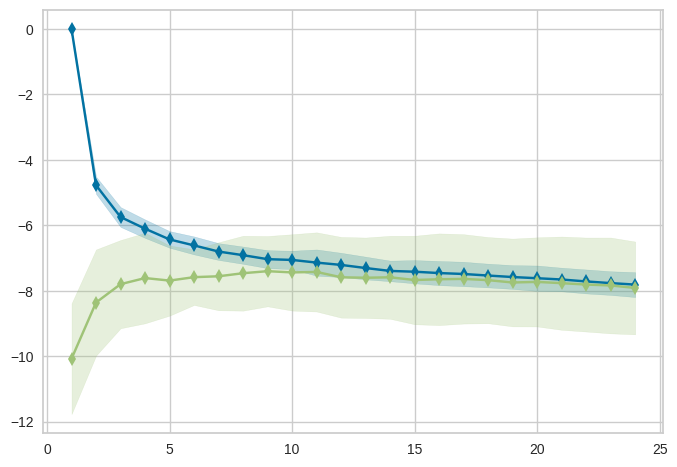

In [ ]:
n_neighbours = np.arange(1, 25, 1)
viz = ValidationCurve(knn_weights, param_name='n_neighbors', param_range=n_neighbours, cv = KFold(shuffle=True), scoring='neg_root_mean_squared_error')
viz.fit(X,y)
# viz.show()

At around 15 nearest neighbours, The model performs well on training as well as validation set

In [ ]:
# Final model
knn_weights = KNeighborsRegressor(15, metric='wminkowski', metric_params={'w':final_attr_weights})
knn_weights.fit(X,y)

KNeighborsRegressor(metric='wminkowski',
                    metric_params={'w': array([2.58448768, 4.2536754 , 4.99573379, 3.61829306, 3.45221353,
       4.63860688, 2.72413423, 3.18699897, 1.04677021, 1.32013695,
       3.43268068, 4.28669078, 2.20439058, 2.15660668, 2.28806726,
       2.22228703, 1.91837075, 3.46568473, 2.17524004, 2.92104244,
       3.66079838, 1.76032605, 3.73494948, 2.13535519, 2.56140228,
       3.77645947...
       3.92212609, 4.08511561, 3.38877938, 2.2541178 , 3.73672801,
       1.05348719, 2.42592983, 1.7990216 , 3.2093256 , 2.74073467,
       4.41237782, 1.06801513, 1.04845448, 3.79249064, 4.13416868,
       2.569813  , 3.12678276, 3.91042262, 4.50047273, 2.77889102,
       1.96344315, 2.38776691, 3.60105947, 3.10583658, 4.47933938,
       2.42725415, 2.27489491, 2.81252674, 4.68077346, 2.29734381,
       3.59641078, 1.01651378, 1.53527017, 3.88614995, 3.33501217])},
                    n_neighbors=15)

In [ ]:
with open('knn_best.pkl', 'wb') as f:
    pickle.dump(knn_weights, f)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
kfold_verify(X,y,rf)

5.907628178869743

## _Tuning n_estimators_

ValidationCurve(ax=<Axes: >,
                cv=KFold(n_splits=5, random_state=None, shuffle=True),
                estimator=RandomForestRegressor(), param_name='n_estimators',
                param_range=array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 11...
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199]),
                scoring='neg_root_mean_squared_error')

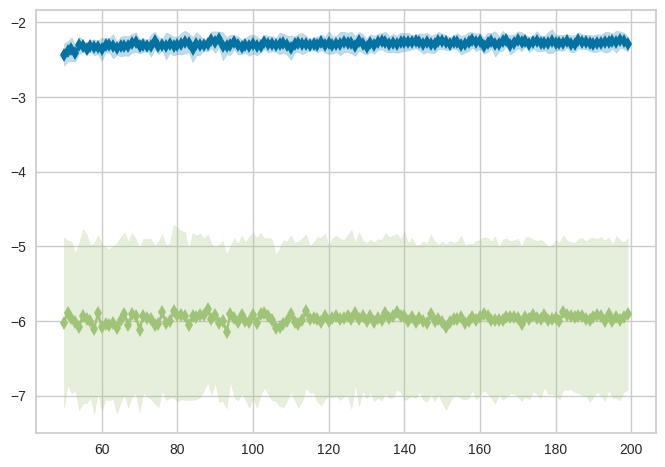

In [ ]:
viz = ValidationCurve(rf, param_name='n_estimators', param_range=np.arange(50, 200), cv = KFold(shuffle=True), scoring='neg_root_mean_squared_error')
viz.fit(X,y)

Not important

ValidationCurve(ax=<Axes: >,
                cv=KFold(n_splits=5, random_state=None, shuffle=True),
                estimator=RandomForestRegressor(), param_name='criterion',
                param_range=array(['mse', 'mae'], dtype='<U3'),
                scoring='neg_root_mean_squared_error')

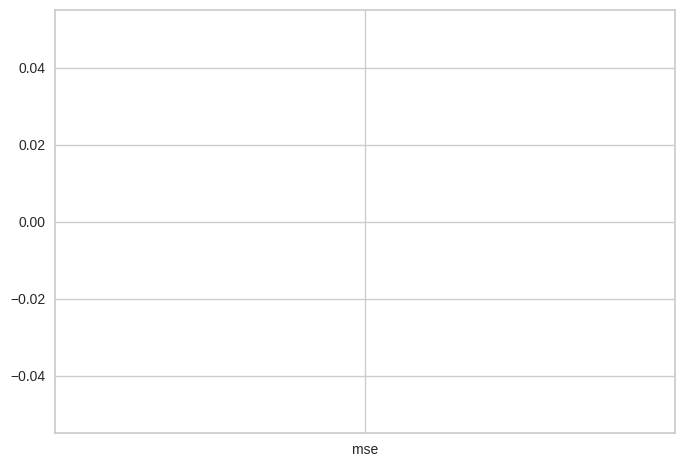

In [ ]:
criterion = ['mse', 'mae']
viz = ValidationCurve(rf, param_name='criterion', param_range=criterion, cv = KFold(shuffle=True), scoring='neg_root_mean_squared_error')
viz.fit(X,y)

Nothing

In [ ]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [ ]:
with open('random_forest_best.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Test data processing pipeline

In [ ]:
test_df = pd.read_csv('/content/football_predict/test_df.csv')

In [ ]:
# Read all_columns.json, cat_col_dict.json

with open('all_columns.json', 'r') as f:
    all_columns = json.load(f)

with open('cat_col_dict.json', 'r') as f:
    cat_col_dict = json.load(f)

In [ ]:
all_columns = eval(all_columns)
cat_col_dict = eval(cat_col_dict)

In [ ]:
test_df = test_df[all_columns]

In [ ]:
test_df.fpl_sel = test_df.fpl_sel.apply(lambda x : float(x[:-1]))

In [ ]:
test_df = test_df.dropna()
test_df.reset_index(drop=True, inplace=True)

In [ ]:
for i in cat_col_dict.keys():
    temp = pd.get_dummies(test_df[i], prefix=i)

    drop1 = set(cat_col_dict[i])
    drop2 = set(temp.columns)
    drop_cols = list(drop1.intersection(drop2))

    orig = pd.DataFrame(np.zeros((temp.shape[0], len(cat_col_dict[i]))), columns=cat_col_dict[i])
    orig[drop_cols] = temp[drop_cols]

    others = temp.drop(drop_cols, axis=1)
    if others.shape[1] == 0:
        others = pd.Series(np.zeros(temp.shape[0]))
    else:
        others = others.apply(np.sum, axis=1)
    others.name = i+'_others'
    test_df = pd.concat([test_df.drop(i, axis=1), orig, others], axis=1)

In [ ]:
cont_cols = list(set(all_columns) - set(cat_col_dict.keys()))
test_cont_cols = test_df[cont_cols].drop('market_value',axis=1)

In [ ]:
test_cont_cols.page_views = test_cont_cols.page_views.apply(np.log)
test_cont_cols.fpl_sel = test_cont_cols.fpl_sel.apply(lambda x : np.log(x+0.01))
test_cont_cols.fpl_points = test_cont_cols.fpl_points.apply(lambda x : x **(1/2))
test_cont_cols.fpl_value = test_cont_cols.fpl_value.apply(lambda x : x ** (-1/2))

In [ ]:
test_cont_cols_scaled = scalar.transform(test_cont_cols)
test_df[test_cont_cols.columns] = test_cont_cols_scaled

In [ ]:
test_X, test_y = test_df.drop('market_value', axis=1), test_df['market_value']

In [ ]:
import os
models = {}
for filename in os.listdir():
    if filename.endswith('.pkl'):
        with open(filename, 'rb') as f:
            models[filename[:-4]] = pickle.load(f)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
for model, obj in models.items():
    y_pred = obj.predict(test_X)
    score = mean_squared_error(test_y.values, y_pred, squared=False)
    print(f'RMSE Score for {model} = {score}')

RMSE Score for random_forest_best = 24.073132796500147
RMSE Score for knn_best = 34.62011110484595


# Random Forest : Prediction

### In this enhanced code, we added a section to visualize the predictions by creating a scatter plot of actual vs. predicted market values. This visualization can help you assess the model's performance more intuitively.

In [ ]:
import pandas as pd
import numpy as np
import json
import pickle
from sklearn.metrics import mean_squared_error

In [ ]:

# Load the trained Random Forest model
with open('/content/random_forest_best.pkl', 'rb') as f:
    rf = pickle.load(f)

# Test data processing pipeline
test_df = pd.read_csv('/content/football_predict/test_df.csv')

# Read all_columns.json, cat_col_dict.json
with open('/content/all_columns.json', 'r') as f:
    all_columns = json.load(f)

with open('/content/cat_col_dict.json', 'r') as f:
    cat_col_dict = json.load(f)

In [ ]:

all_columns = eval(all_columns)
cat_col_dict = eval(cat_col_dict)

test_df = test_df[all_columns]
test_df.fpl_sel = test_df.fpl_sel.apply(lambda x: float(x[:-1]))

test_df = test_df.dropna()
test_df.reset_index(drop=True, inplace=True)

<ipython-input-73-34826034de10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.fpl_sel = test_df.fpl_sel.apply(lambda x: float(x[:-1]))


In [ ]:

for i in cat_col_dict.keys():
    temp = pd.get_dummies(test_df[i], prefix=i)

    drop1 = set(cat_col_dict[i])
    drop2 = set(temp.columns)
    drop_cols = list(drop1.intersection(drop2))

    orig = pd.DataFrame(np.zeros((temp.shape[0], len(cat_col_dict[i]))), columns=cat_col_dict[i])
    orig[drop_cols] = temp[drop_cols]

    others = temp.drop(drop_cols, axis=1)
    if others.shape[1] == 0:
        others = pd.Series(np.zeros(temp.shape[0]))
    else:
        others = others.apply(np.sum, axis=1)
    others.name = i+'_others'
    test_df = pd.concat([test_df.drop(i, axis=1), orig, others], axis=1)

cont_cols = list(set(all_columns) - set(cat_col_dict.keys()))
test_cont_cols = test_df[cont_cols].drop('market_value', axis=1)

In [ ]:
# Perform the same scaling as was done for training data
test_cont_cols.page_views = test_cont_cols.page_views.apply(np.log)
test_cont_cols.fpl_sel = test_cont_cols.fpl_sel.apply(lambda x : np.log(x+0.01))
test_cont_cols.fpl_points = test_cont_cols.fpl_points.apply(lambda x : x **(1/2))
test_cont_cols.fpl_value = test_cont_cols.fpl_value.apply(lambda x : x ** (-1/2))

In [ ]:
# Use the same scaler as used for training data
test_cont_cols_scaled = scalar.transform(test_cont_cols)
test_df[test_cont_cols.columns] = test_cont_cols_scaled

test_X, test_y = test_df.drop('market_value', axis=1), test_df['market_value']

ValueError: ignored

RMSE Score for Random Forest Model = 24.073132796500147


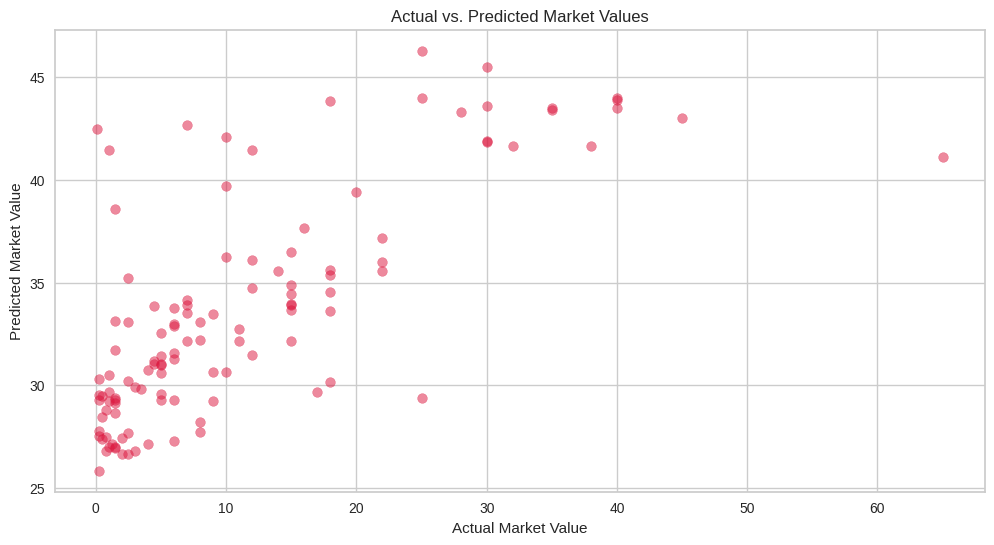

In [ ]:




# Make predictions using the trained Random Forest model
y_pred = rf.predict(test_X)

# Calculate RMSE Score
score = mean_squared_error(test_y.values, y_pred, squared=False)
print(f'RMSE Score for Random Forest Model = {score}')

# Visualize Predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(test_y, y_pred, alpha=0.5, color='crimson' )
plt.title('Actual vs. Predicted Market Values')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.grid(True)
plt.show()